In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv("data.csv")
data = df.drop(['filename', 'label'],axis=1)

k_means = KMeans(n_clusters=2, max_iter=50, n_init='auto', random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=df.filename, columns=['Cluster ID'])

,Cluster ID
filename,
blues.00081.au,0
blues.00022.au,0
blues.00031.au,0
blues.00012.au,0
blues.00056.au,0
...,...
rock.00017.au,1
rock.00081.au,1
rock.00004.au,0


In [17]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,119.501775,56.455531,0.329612,0.100956,1572.801053,1817.616345,3193.386041,0.071866,-211.480253,125.698305,...,-6.332429,3.050628,-4.462455,0.777079,-3.326921,0.253304,-3.778760,-0.557792,-2.217979,-2.255563
1,119.687168,57.721707,0.420602,0.156563,2739.838479,2606.008308,5750.558802,0.130811,-87.173982,77.189760,...,-5.754862,5.686947,-5.083562,2.640656,-4.335000,1.913199,-4.128798,1.418265,-2.423545,-0.102152


<Axes: xlabel='beats', ylabel='zero_crossing_rate'>

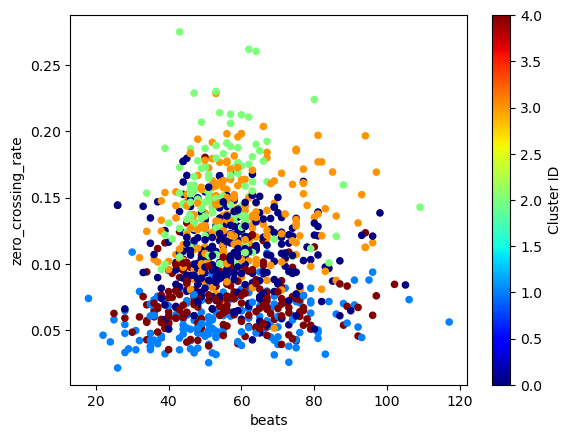

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
k_means = KMeans(n_clusters=5, max_iter=50, init='k-means++', n_init='auto', random_state=1)
k_means.fit(data)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data,labels1), axis=1)
result1.plot.scatter(x='beats',y='zero_crossing_rate',c='Cluster ID',colormap='jet')

<Axes: xlabel='spectral_centroid', ylabel='spectral_bandwidth'>

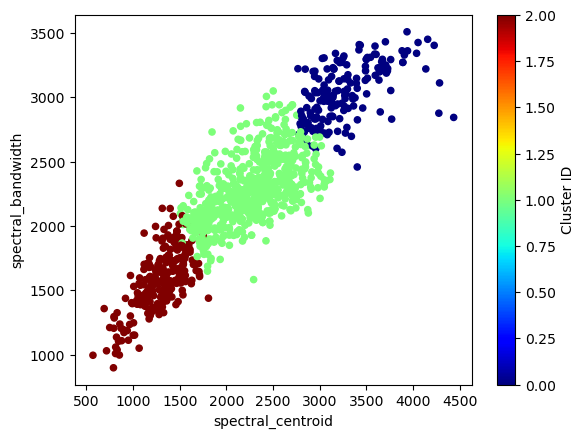

In [73]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
ac.fit(data)
labels2 = pd.DataFrame(ac.labels_,columns=['Cluster ID'])
result2 = pd.concat((data,labels2), axis=1)
result2.plot.scatter(x='spectral_centroid',y='spectral_bandwidth',c='Cluster ID',colormap='jet')

<Axes: xlabel='tempo', ylabel='rmse'>

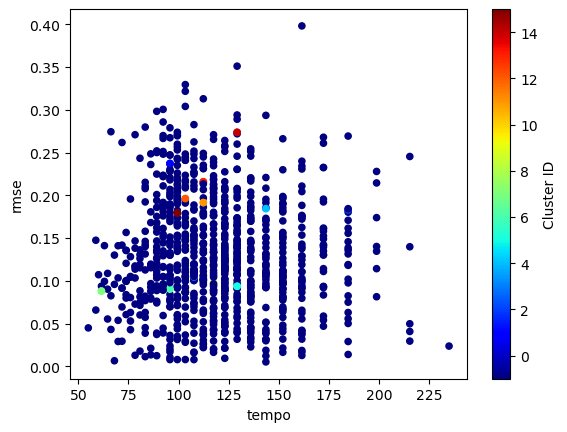

In [68]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=7.5, min_samples=2, metric='manhattan').fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='tempo',y='rmse',c='Cluster ID', colormap='jet')